In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
data = pd.read_csv('gss.csv', low_memory=False)

## FRIST IS NEEDED TO EXAMINE DE DATA TO KNOW THE NAME OF THE COLUMNS, AS IS STATED ABOVE THAT THERE ARE SEVERAL COLUMNS WITH DIFFERENT DATA TYPES.

THE DATA IS TAKEN FROM THE "GENERAL SOCIAL SURVEY" FROM THE UNIVERSITY OF CHICAGO FROM 1972 TO 2012.

In [ ]:
data.head()

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,...,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
0,1,1972,23.0,Female,White,NaN,NaN,16.0,10.0,NaN,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,70.0,Male,White,NaN,NaN,10.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1972,48.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1972,27.0,Female,White,NaN,NaN,17.0,16.0,12.0,...,Once A Week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1972,61.0,Female,White,NaN,NaN,12.0,8.0,8.0,...,Everyday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## THERE IS A DICTIONARY FOR THE COLUMNS NAMES, THEREFORE DURING THE ANALYSIS THERE WILL BE EXPLANATIONS FOR BETTER UNDERSTANDING.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57061 entries, 0 to 57060
Columns: 114 entries, caseid to helpblk
dtypes: float64(13), int64(2), object(99)
memory usage: 49.6+ MB


In [ ]:
data.describe()

,caseid,year,age,educ,paeduc,maeduc,speduc,sei,sibs,childs,agekdbrn,granborn,coninc,rank,tvhours
count,57061.000000,57061.000000,56859.000000,56897.000000,40173.000000,46929.000000,29626.000000,31277.000000,55382.000000,56880.000000,18119.000000,44996.000000,51232.000000,9854.000000,33855.000000
mean,28531.000000,1992.084261,45.697955,12.753590,10.554004,10.713844,12.780328,48.423570,3.940053,1.952848,23.787130,1.154547,44503.038316,4.772681,2.970699
std,16472.236192,11.724820,17.472112,3.181642,4.349151,3.744795,3.128766,19.183154,3.190929,1.791539,5.432127,1.604481,35936.012301,1.855722,2.353317
min,1.000000,1972.000000,18.000000,0.000000,0.000000,0.000000,0.000000,17.100000,0.000000,0.000000,9.000000,0.000000,383.000000,1.000000,0.000000
25%,14266.000000,1983.000000,31.000000,12.000000,8.000000,8.000000,12.000000,32.400002,2.000000,0.000000,20.000000,0.000000,18445.000000,4.000000,2.000000
50%,28531.000000,1993.000000,43.000000,12.000000,12.000000,12.000000,12.000000,39.000000,3.000000,2.000000,23.000000,0.000000,35602.000000,5.000000,2.000000
75%,42796.000000,2002.000000,59.000000,15.000000,13.000000,12.000000,15.000000,63.500000,5.000000,3.000000,27.000000,2.000000,59542.000000,6.000000,4.000000
max,57061.000000,2012.000000,89.000000,20.000000,20.000000,20.000000,20.000000,97.199997,68.000000,8.000000,65.000000,4.000000,180386.000000,10.000000,24.000000


## GENERAL DESCRIPTION OF THE DATA ABOVE. SOME DATA TYPES, EVEN THOUGH ARE NUMERICAL, THERE IS NO NEED TO MAKE ALL THE STATISTICAL DESCRIPTIONS, THEREFORE SOME STATISTICAL DESCRIPTIONS CAN BE IGNORED.

### ONE EXAMPLE WOULD BE THE CASEID WICH IS ONLY FOR IDENTIFICATION PRUPOUSES DURING DATA EXPLORATION.

### OTHER EXAMPLE WOULD BE THE YEAR, WICH CAN BE USED FOR KNOWING WICH YEARS HAVE MORE REGISTRIES, SO IN CASE WE NEED TO EXTRACT A INTERVAL FOR A HYPOTESIS, A DENSER SAMPLE WOULD MEAN A SMALLER INTERVAL.

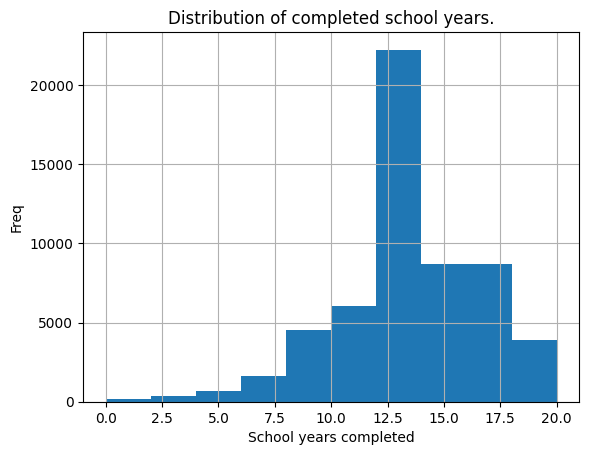

In [ ]:
data['educ'].hist()
plt.xlabel('School years completed')
plt.ylabel('Freq')
plt.title('Distribution of completed school years.')
plt.show()


## THE 'EDUC' COLUMN COUNTS THE NUMBER OF COMPLETED SCHOOL YEARS DECLARED BY THE PERSON SURVEYED. THE HISTOGRAM IS SOMEWHAT NORMAL IN DISTRIBUTION.

### IT CAN BE SEEN THAT THE MAYORITY OF THE SURVEYED PEOPLE DECLARES ABOUT 13 YEARS OF COMPLETED SCHOOL YEARS, WICH GOES ACCORDINGLY WITH THE MEAN ABOVE WICH IS 12.75. THIS IS NOT NECESARILY TRUE IN ALL DATASETS, GENERALLY SPEAKING, THE BIGGER THE STANDARD DEVIATION IS LESS PROBABLE THAT THE MODE IS SIMILAR THE MEAN, THIS IS NOT A RULE, IT CAN OCCUR THE CONTRARY, BUT THAT WOULD MEAN THERE IS A BIGGER PEAK THAN IN THIS CASE, WICH WOULD NEED A DIFFERENT ANALYSIS.

In [5]:
import statsmodels.api as sm

In [ ]:
prop_guns = data['owngun'].value_counts(normalize=True)
print("Proportion of people owning at least one  gun at home:", prop_guns[1])

Proportion of people owning at least one  gun at home: 0.4854368932038835


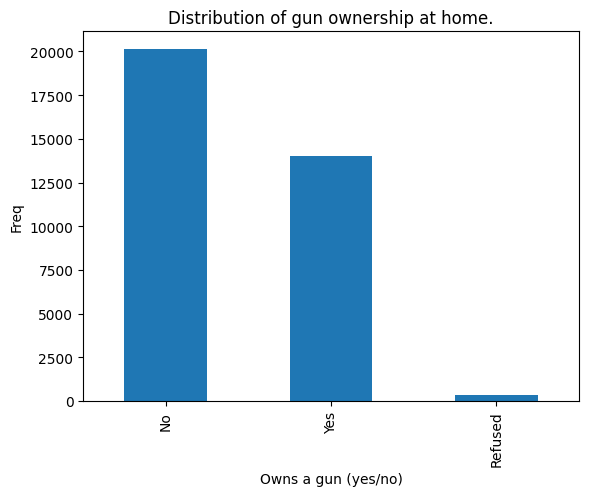

In [ ]:
data['owngun'].value_counts().plot(kind='bar')
plt.xlabel('Owns a gun (yes/no)')
plt.ylabel('Freq')
plt.title('Distribution of gun ownership at home.')
plt.show()

## FIRST IS VISUALIZED THE FREQUENCY OF PEOPLE SURVEYED WITH AT LEAST ONE GUN AT HOME.

In [6]:
!pip install statsmodels

In [ ]:
from scipy.stats import chi2_contingency

# NOW LETS PRETEND A DATA PROFESSIONAL IS ASKED TO DETERMINE IF THERE IS A RELATIONSHIP BETWEEN GUN OWNERSHIP AND EDUCATION, SO INSTEAD OF GUN REGULATION, THE GOVERMENT COULD MAKE EDUCATION BASED STRATEGIES TO IMPOROVE GUN CONTROL WITHOUT THE POLITICAL BACKLASH THAT COMES WITH A MORE DIRECT APROACH.

H0: THERE IS NO ASSOCIATION BETWEEN THE NUMBER OF YEARS OF EDUCATION COMPLETED (EDUC) AND GUN OWNERSHIP (OWNGUN).
HA: THERE IS A INVERSE ASSOCIATION BETWEEN THE NUMBER OF YEARS OF EDUCATION COMPLETED AND GUN OWNERSHIP.

SINCE THERE IS A NUMERIC DATA COLUMN AND A CATEGORIC DATA COLUMN, CHI SQUARED APROACH IS USED TO DETERMINE IF THERE IS RELATION BETWEEN THOSE COLUMNS.

In [ ]:
contingency_table = pd.crosstab(data['educ'], data['owngun'])
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)
print("Chi-square test:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value_chi2)

Chi-square test:
Chi-square statistic: 334.19316733434397
p-value: 4.307418318315088e-48


SINCE THERE IS A COMPARISON OF A CATEGORIC DATATYPE AND A NUMERICAL DATATYPE, AN ANALYTICAL APROACH IS NEEDED, IF THE CASE WERE TWO NUMERICAL VARIABLES, A SIMPLE SCATTER GRAPH WOULD BE ENOUGH TO DETERMINE IF THERE IS A CORRELATION.

### WITH THAT CONSIDERABLY BIG CHI SQUARED STATISTIC AND A EXCEPTIONALLY LOW P VALUE, MUCH LOWER THAN 0.05 WICH WOULD BE STATISTICALLY SIGNIFICANT, THE H0 CAN BE REJECTED, THEREFORE THE EVIDENCE GOES IN FAVOR TO BE THE EDUCATION A GOOD MEASURE FOR GUN CONTROL, AND A STRATEGY CAN BEGIN TO BE DEVELOPED. IN  THIS CASE IT WOULD BE A GOOD IDEA TO GATHER MORE DATA TO MEASURE WICH APROACH WITH EDUCATION WOULD BE THE BEST TO MAXIMICE RESULTS WITH THE LEAST RESOURSES SPENT IN THE EXECUTION OF THE PROJECT.

In [7]:
grouped_data = data.groupby('educ')['owngun'].value_counts(normalize=True)

In [8]:
ownership_proportions = grouped_data[grouped_data.index.get_level_values(1) == 'Yes']
ownership_proportions_str = (ownership_proportions * 100).apply(lambda x: f"{x:.1f}%")
print(ownership_proportions_str)

educ  owngun
0.0   Yes       42.9%
1.0   Yes       52.9%
2.0   Yes       44.9%
3.0   Yes       37.3%
4.0   Yes       45.4%
5.0   Yes       41.7%
6.0   Yes       41.9%
7.0   Yes       44.4%
8.0   Yes       44.5%
9.0   Yes       43.2%
10.0  Yes       41.3%
11.0  Yes       45.1%
12.0  Yes       49.1%
13.0  Yes       41.8%
14.0  Yes       43.0%
15.0  Yes       39.0%
16.0  Yes       36.0%
17.0  Yes       38.0%
18.0  Yes       34.7%
19.0  Yes       34.3%
20.0  Yes       31.1%
Name: proportion, dtype: object


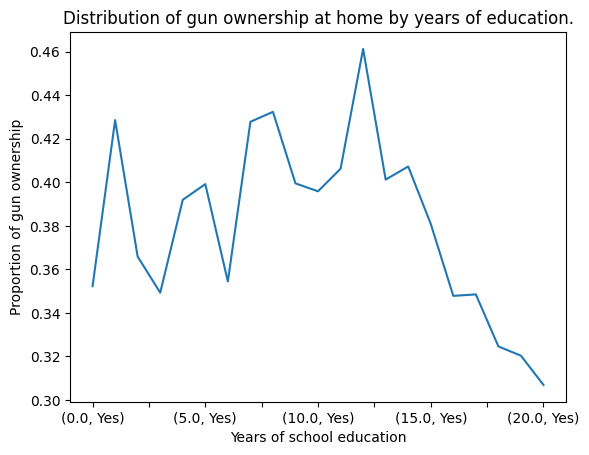

In [ ]:
ownership_proportions.plot(kind='line')
plt.xlabel('Years of school education')
plt.ylabel('Proportion of gun ownership')
plt.title('Distribution of gun ownership at home by years of education.')
plt.show()

### IT CAN BE SEEN THAT FROM 13 YEARS OF EDUCATION, THE PROBABILITY FOR AN INDIVIDUAL TO OWN A GUN AT HOME DECREASES ABRUPTLY. THE PEAK IT´S RIGHT NEXT TO THE MEAN OF THE YEARS OF EDUCATION, SO IT´S IMPORTANT TO REVIEW WHY THIS FENOMENON HAPPENS.

In [ ]:
print(data['coninc'].isnull().sum())
print(data['educ'].isnull().sum())

5829
164


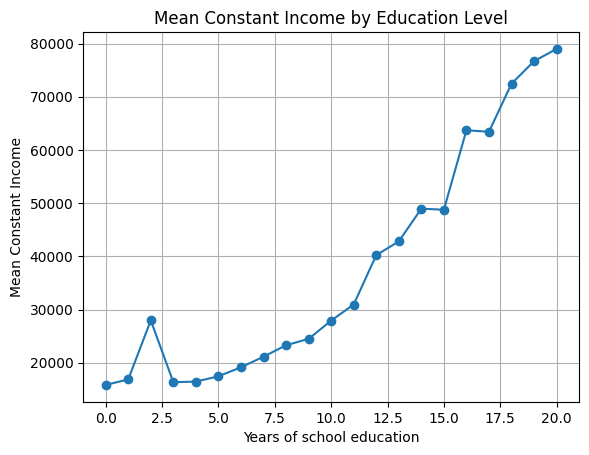

In [ ]:
mean_coninc_by_educ = data.groupby('educ')['coninc'].mean()
mean_coninc_by_educ.plot(kind='line', marker='o')
plt.xlabel('Years of school education')
plt.ylabel('Mean Constant Income')
plt.title('Mean Constant Income by Education Level')
plt.grid(True)
plt.show()

## AS EXPECTED THERE IS A POSITIVE LINEAR RELATIONSHIP BETWEEN EDUCATION AND INCOME, THE HYPOTESIS WOULD BE THAT UNDER 10 YEARS OF EDUCATION (WHERE THE SLOPE OF THE GRAPH 'Distribution of gun ownership at home by years of education.' CHANGES ABRUPTLY) THE LOW INCOME IS THE MAIN REASON THE GUN OWNERSHIP IS NOT HIGHER, AND OVER 15 YEARS OF EDUCATION, THE EDUCATION ITSELF IS THE REASON PEOPLE ARE NOT INTERESTED IN OWNING GUNS.

In [ ]:
group_1_data = data[data['educ'] <= 10]
group_2_data = data[(data['educ'] == 13)]

group_1_ownership_prop = (group_1_data['owngun'] == 'Yes').mean()
group_2_ownership_prop = (group_2_data['owngun'] == 'Yes').mean()

group_1_avg_income = group_1_data['coninc'].mean()
group_2_avg_income = group_2_data['coninc'].mean()

print(f"Gun ownership proportion (<=10 years): {group_1_ownership_prop}")
print(f"Gun ownership proportion (10-15 years): {group_2_ownership_prop}")
print(f"Average income (<=10 years): ${group_1_avg_income:.2f}")
print(f"Average income (10-15 years): ${group_2_avg_income:.2f}")

Gun ownership proportion (<=10 years): 0.25137266646700607
Gun ownership proportion (10-15 years): 0.24335723323492198
Average income (<=10 years): $23659.77
Average income (10-15 years): $42807.73


# H0: THERE IS NO DIFFERENCE IN GUN OWNERSHIP PROPORTION BETWEEN GROUPS.
# HA: THERE IS A DIFFERENCE IN GUN OWNERSHIP PROPORTION BETWEEN GROUPS.

In [ ]:
t_statistic, p_value = stats.ttest_ind_from_stats(
    mean1=group_1_ownership_prop,
    std1=np.sqrt(group_1_ownership_prop * (1 - group_1_ownership_prop) / len(group_1_data)),
    nobs1=len(group_1_data),
    mean2=group_2_ownership_prop,
    std2=np.sqrt(group_2_ownership_prop * (1 - group_2_ownership_prop) / len(group_2_data)),
    nobs2=len(group_2_data),
)

print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in gun ownership proportion between groups.")
else:
    print("There is no significant difference in gun ownership proportion between groups.")


t-statistic: 90.5364
p-value: 0.0000
There is a significant difference in gun ownership proportion between groups.


### WHILE THE ANALYSIS CANNOT DEFINITIVELY ESTABLISH CAUSATION, THE RESULTS SUGGEST A POSSIBLE ASSOCIATION BETWEEN EDUCATION LEVEL, INCOME, AND GUN OWNERSHIP. INDIVIDUALS WITH LESS THAN 13 YEARS OF EDUCATION TEND TO HAVE LOWER INCOMES AND LOWER GUN OWNERSHIP RATES. THIS MIGHT IMPLY A LINK BETWEEN INCOME AND GUN OWNERSHIP IN THIS GROUP. CONVERSELY, FOR INDIVIDUALS WITH MORE THAN 15 YEARS OF EDUCATION, GUN OWNERSHIP SEEMS LESS PREVALENT, POTENTIALLY SUGGESTING THAT EDUCATION ITSELF MAY BE A FACTOR INFLUENCING GUN CONTROL ATTITUDES, INDEPENDENT OF INCOME. THESE INSIGHTS SUPPORT FURTHER INVESTIGATION INTO THE RELATIONSHIP BETWEEN SOCIOECONOMIC FACTORS AND GUN OWNERSHIP. ADDITIONALLY, THEY LEND SUPPORT TO THE IDEA OF INVESTING IN INITIATIVES THAT INCREASE EDUCATIONAL ATTAINMENT, AS THIS MAY HAVE BROADER SOCIETAL BENEFITS BEYOND JUST BETTER INCOME.